In [134]:
import mat73
import matplotlib as mpl
import pandas as pd
import pylab as pl
import seaborn as sns

In [101]:
%matplotlib notebook

In [261]:
f0 = '/Users/julianarhee/Documents/rutalab/papers/Mahmut2021/2018_09_12_NA_3_3ds_5do_IS_1.mat'
fn = '/Users/julianarhee/Documents/rutalab/papers/Mahmut2021/ComplexPlumeNavigationPaperData.mat'
d = mat73.loadmat(fn)

ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB

In [262]:
dd = mat73.loadmat(fn)
dd.keys()

ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB type not supported: table, (uint32)
ERROR:root:ERROR: MATLAB

dict_keys(['ComplexPlume', 'ComplexPlumeWithBlocks', 'Control', 'SmokeGCMS', 'StraightPlume'])

In [296]:
sorted_cols = [v[0] for v in sorted(d['StraightPlume']['Smoke']['Dose3']['col'].items(), \
                      key=lambda x: x[1])]
mat = d['StraightPlume']['Smoke']['Dose3']['expmat']
df = pd.DataFrame(data=mat, columns=sorted_cols)

In [297]:
# d['StraightPlume'].keys(): dict_keys(['ACV', 'EA', 'Smoke'])
# d['StraightPlume']['ACV'].keys(): ['Dose1', 'Dose2', 'Dose3', 'Dose4', 'Dose5', 'OdorDosePercent']
# acv = d['StraightPlume']['Smoke'].copy()

In [298]:
acv[curr_dose]['stats'].keys()

dict_keys(['ExpFlyNum', 'T', 'UniqueTotFlyNum', 'age', 'fps', 'lenexp', 'lentrj', 'mspd', 'mtrjlen', 'nexp', 'nfile', 'noflym', 'noflyt', 'noftrj', 'ntrj', 'pstopall', 'pstoplist', 'roomH', 'roomT', 'spdema', 'spdemt', 'spdltrj', 'spdvma', 'spdvmt', 'starve'])

In [299]:
curr_dose = 'Dose3'
df = pd.DataFrame(data=acv[curr_dose]['expmat'], columns = acv[curr_dose]['column'])

In [300]:
df[['trjNum', 'vialNum', 'trialNum', 'fileindex', 'trjNumVideo']].drop_duplicates()

,trjNum,vialNum,trialNum,fileindex,trjNumVideo
0,1.0,1.0,1.0,1.0,1.0
2723,2.0,1.0,1.0,1.0,2.0
4475,3.0,1.0,1.0,1.0,3.0
7198,4.0,1.0,1.0,1.0,4.0
9921,5.0,1.0,1.0,1.0,5.0
...,...,...,...,...,...
1280781,991.0,15.0,1.0,24.0,23.0
1283422,992.0,15.0,1.0,24.0,24.0
1286063,993.0,15.0,1.0,24.0,25.0
1288146,994.0,15.0,1.0,24.0,26.0


In [301]:
traj['signal_threshold'].dropna()

Series([], Name: signal_threshold, dtype: float64)

In [349]:
print(df['x'].min(), df['x'].max())
long_traj = [t for t, df_ in df.groupby('trjNum')\
             if df_['x'].iloc[0]>=225 and df_['x'].iloc[-1]<=50\
             and abs(df_['x'].max()-df_['x'].min() ) > 200]
len(long_traj)

6.504646718066406 305.9938378378378


40

In [350]:
40/3

13.333333333333334

<IPython.core.display.Javascript object>


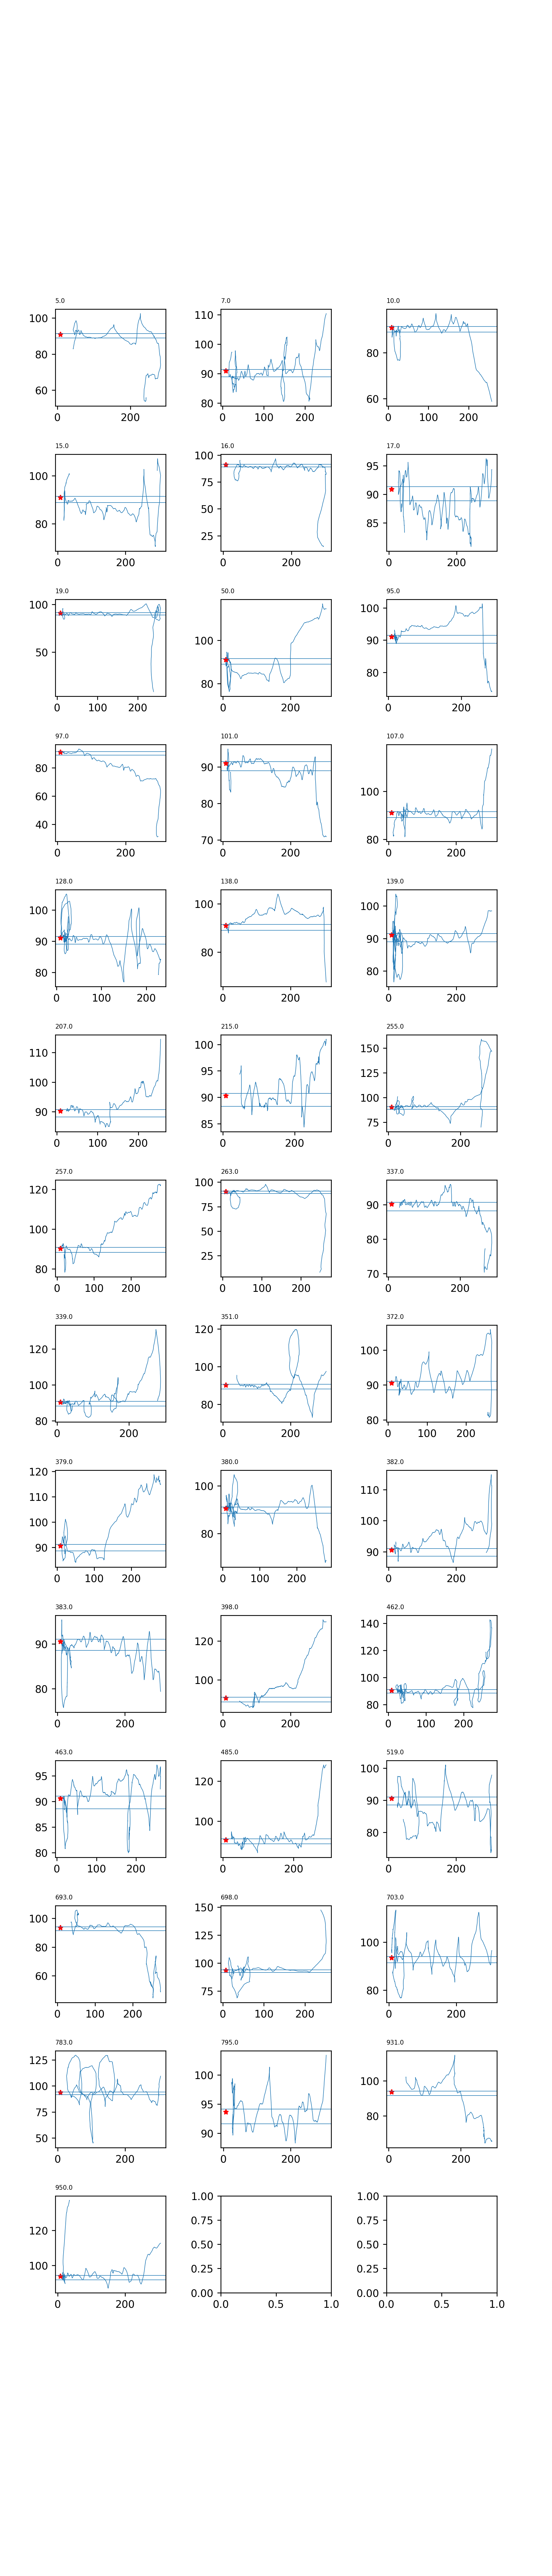

In [352]:
#traj = df[df['trjNum']==4]
#long_traj = [2, 5, 7, 10]
#traj = df[(df['fileindex']==1) & (df['trjNum'].isin(long_traj))]
traj = df[ (df['trjNum'].isin(long_traj))].copy()

# assert len(traj['sx'].unique())==1, "More than one x pos for source"
# assert len(traj['sy'].unique())==1, "More than one x pos for source"

# sx = traj['sx'].unique()[0]
# sy = traj['sy'].unique()[0]

nr=14; nc=3;
fig, axn =pl.subplots(nr, nc, figsize=(nc*2.5, nr*2.5), sharey=False)
for ax, (t, df_) in zip(axn.flat, traj.groupby('trjNum')):
    sx = df_['sx'].unique()[0]
    sy = df_['sy'].unique()[0]
    ax.plot(df_['x'], df_['y'], label=t, lw=0.5)
#sns.lineplot(data=traj, x='x', y='y', hue='trjNum', ax=ax, palette='colorblind')
    ax.plot(sx, sy, 'r*', markersize=5)
    ax.axhline(y=sy+0.5, lw=0.5)
    ax.axhline(y=sy-2, lw=0.5)
    #ax.legend(bbox_to_anchor=(1,1), loc='upper left')
    ax.set_title(t, loc='left', fontsize=6)
pl.subplots_adjust(left=0.1, right=0.9, wspace=0.5, hspace=0.5)

<IPython.core.display.Javascript object>


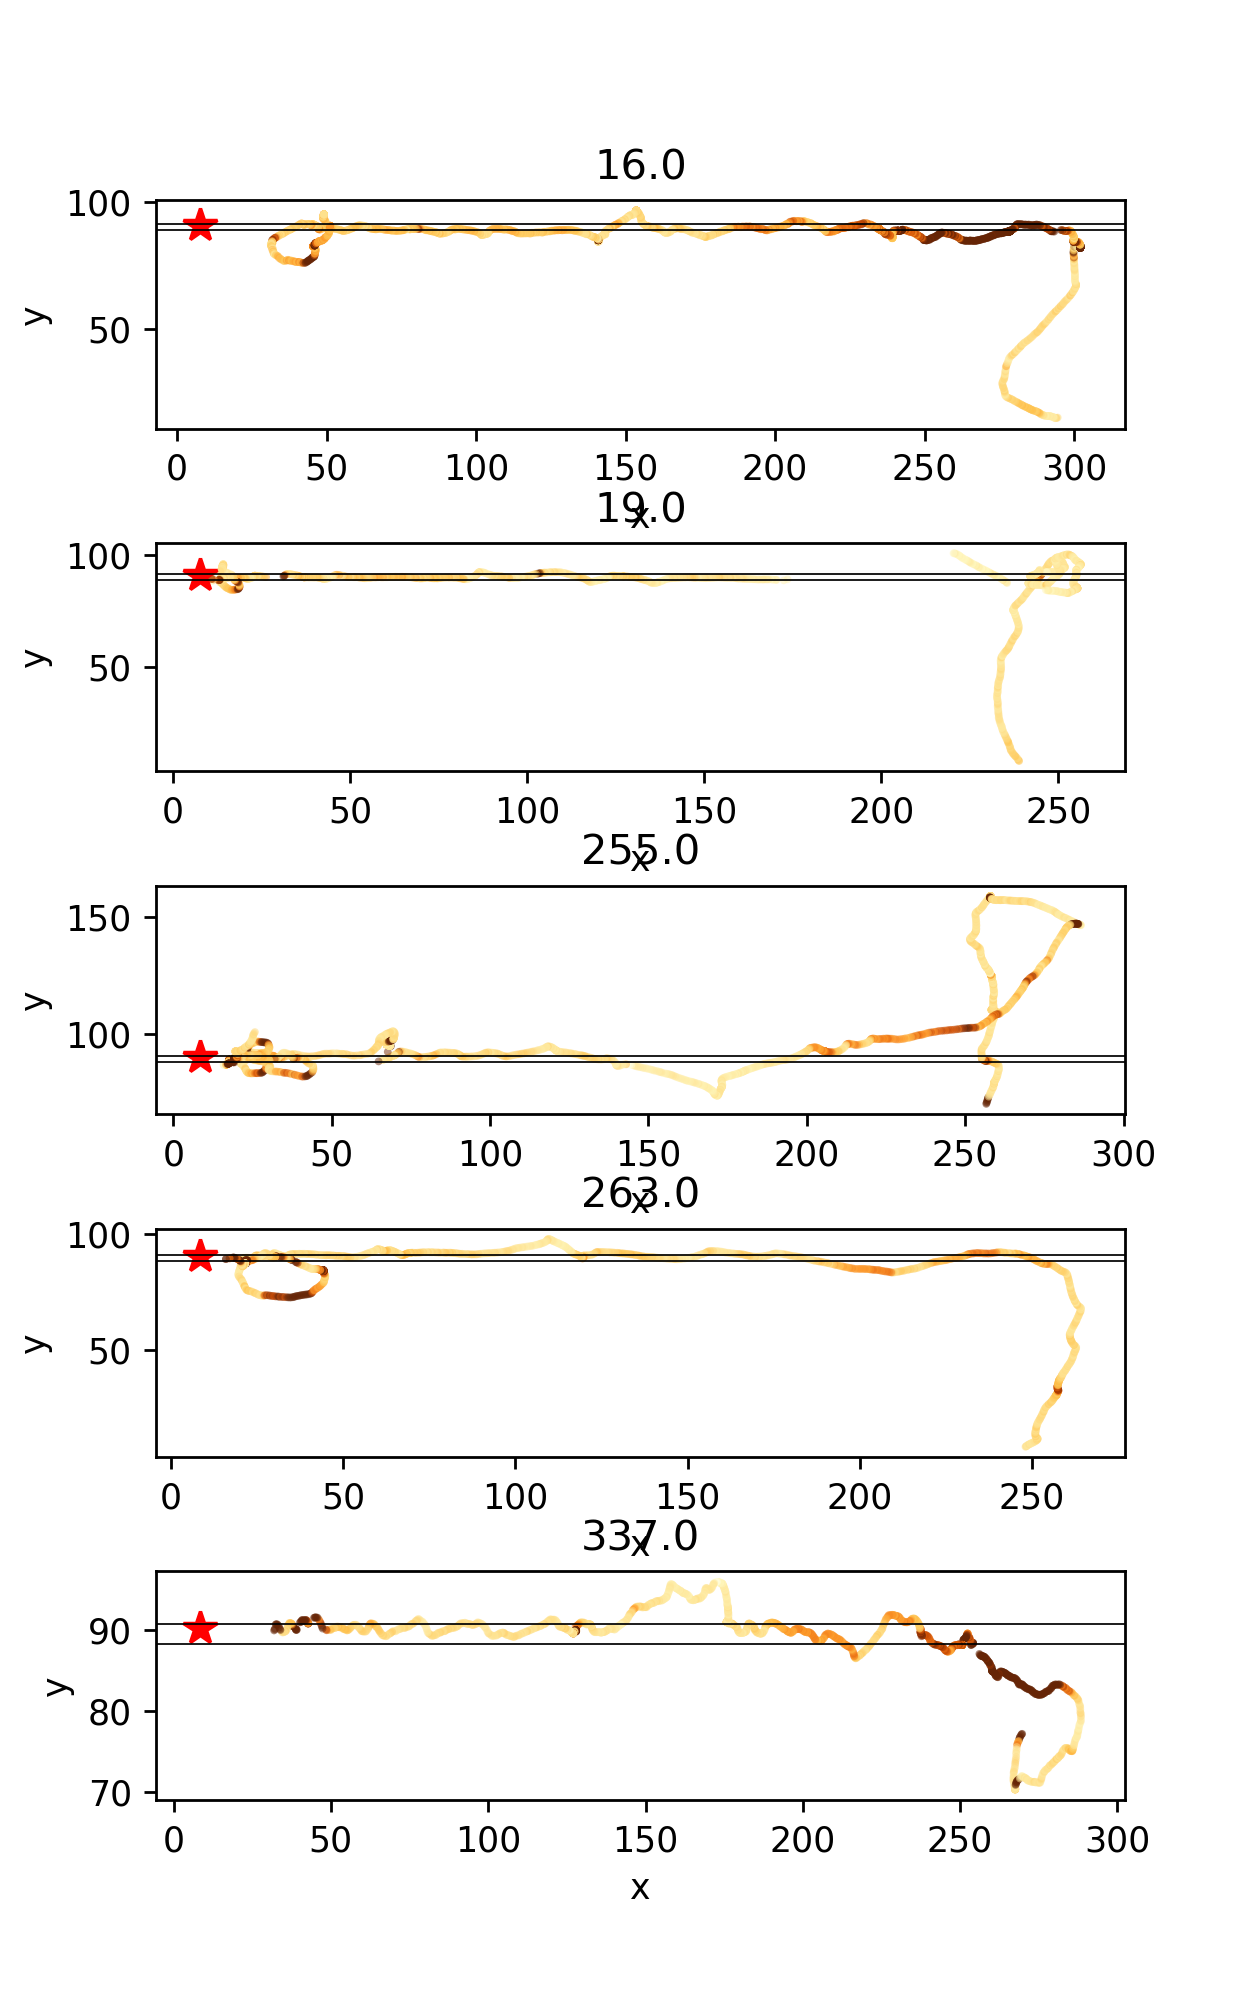

In [366]:
hue_norm = mpl.colors.Normalize(vmin=0, vmax=20)
trajectories = [16, 19, 337, 255, 263]
tnum = 16

fig, axn = pl.subplots(5, 1, figsize=(5, 8))
for ax, (tnum, df_) in zip(axn.flat, df[df['trjNum'].isin(trajectories)].groupby('trjNum')):
    sx = df_['sx'].unique()[0]
    sy = df_['sy'].unique()[0]
    sns.scatterplot(data=df_, x='x', y='y', edgecolor='none', s=5,alpha=0.5, ax=ax,
                   hue='signal', palette='YlOrBr', hue_norm=hue_norm, legend=0)
    ax.plot(sx, sy, 'r*', markersize=10)
    ax.plot(sx, sy, 'r*', markersize=5)
    ax.axhline(y=sy+0.5, lw=0.5, c='k')
    ax.axhline(y=sy-2, lw=0.5, c='k')
    ax.set_title(tnum)
pl.subplots_adjust(hspace=0.5, bottom=0.1, top=0.9)

In [231]:
signal_thr=10
# traj['signal_detected'] = False
traj['signal_mask'] = 0
traj.loc[traj['signal']>=signal_thr, 'signal_mask'] = 1
traj['signal_mask'].max()

traj['signal_detected'] = traj['signal'].values
traj.loc[traj['signal_mask']==0, 'signal_detected'] = 0

In [241]:
traj['signal_detected'].max()

216.63636363636363

<IPython.core.display.Javascript object>


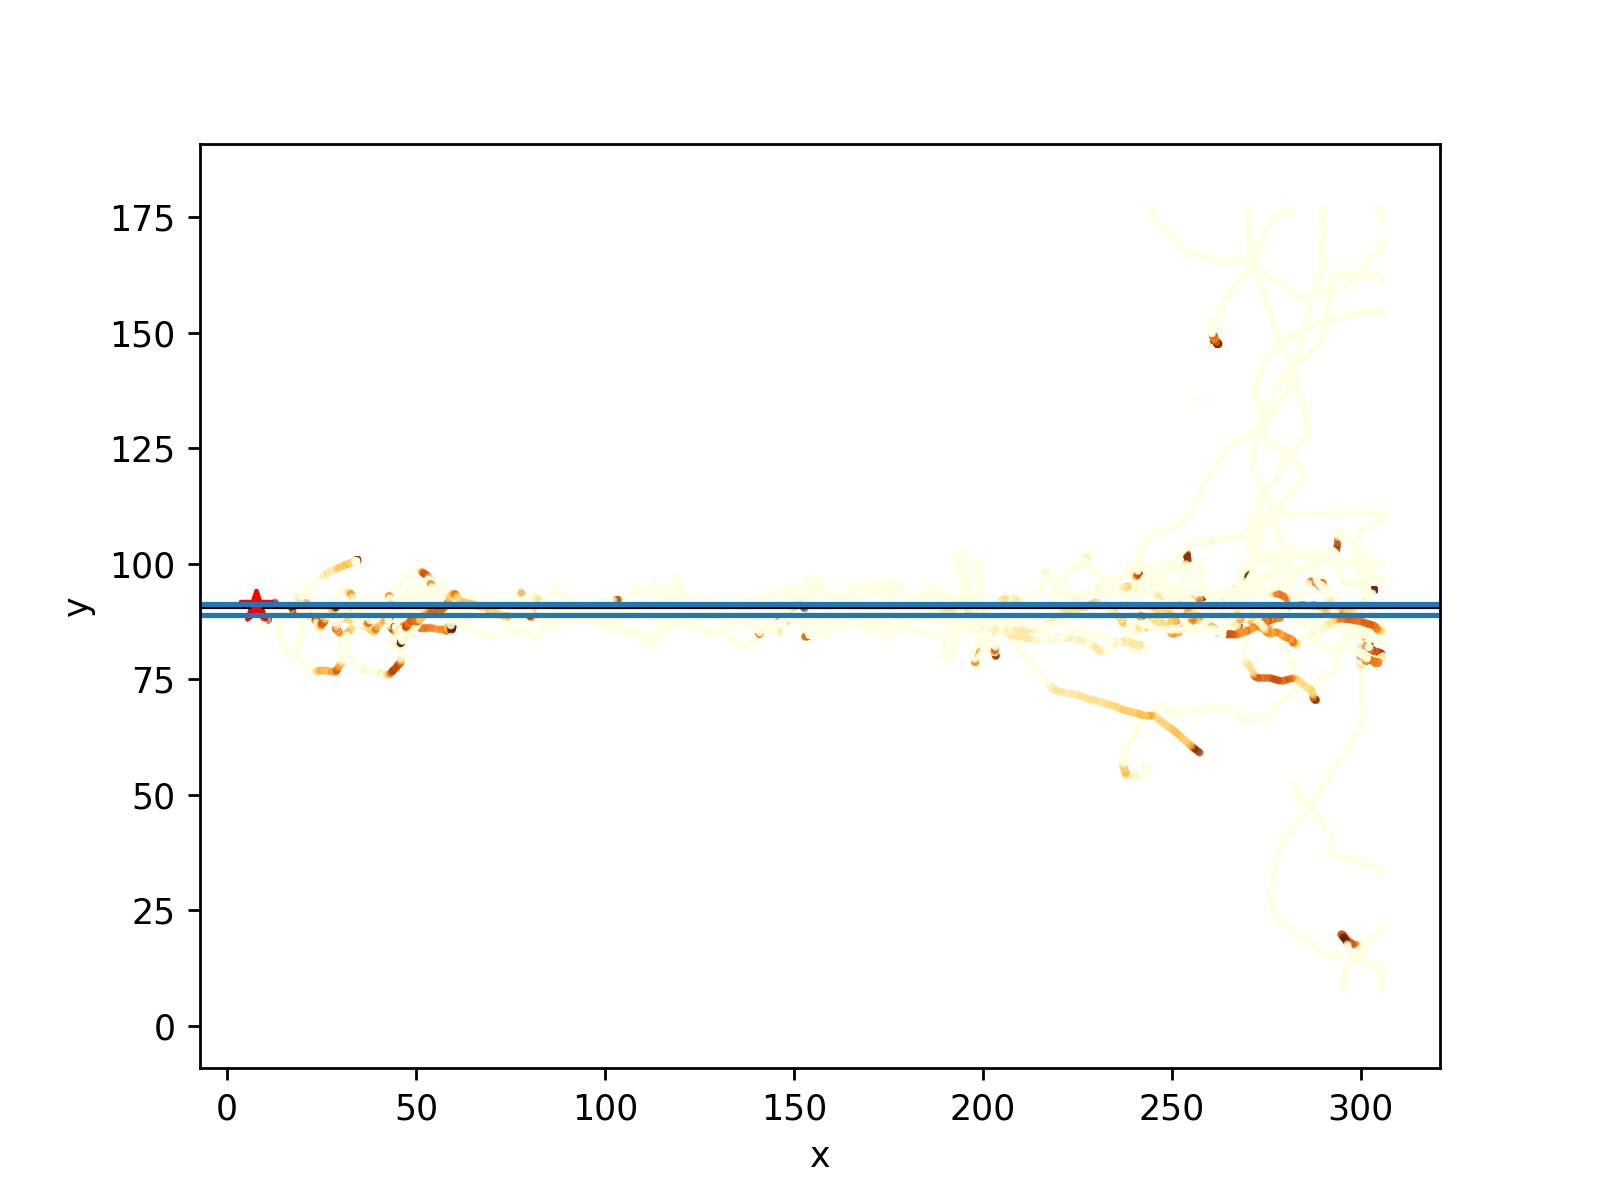

(-9.14, 190.86)

In [245]:
hue_norm = mpl.colors.Normalize(vmin=0, vmax=50)
tnum = 5
#tj = df[(df['fileindex']==1) & (df['trjNum']==tnum)].copy()

fig, ax = pl.subplots()
for tnum, tj in traj.groupby('trjNum'):
    #tj['signal_mask'] = 0
    sns.scatterplot(data=tj, x='x', y='y', edgecolor='none', s=5,alpha=0.5,
                   hue='signal_detected', palette='YlOrBr', hue_norm=hue_norm, legend=0)
ax.plot(sx, sy, 'r*', markersize=10)
ax.axhline(y=sy, c='k')
ax.plot(sx, sy, 'r*', markersize=5)
ax.axhline(y=sy+0.5)
ax.axhline(y=sy-2)

ax.set_ylim([sy-100, sy+100])

<IPython.core.display.Javascript object>


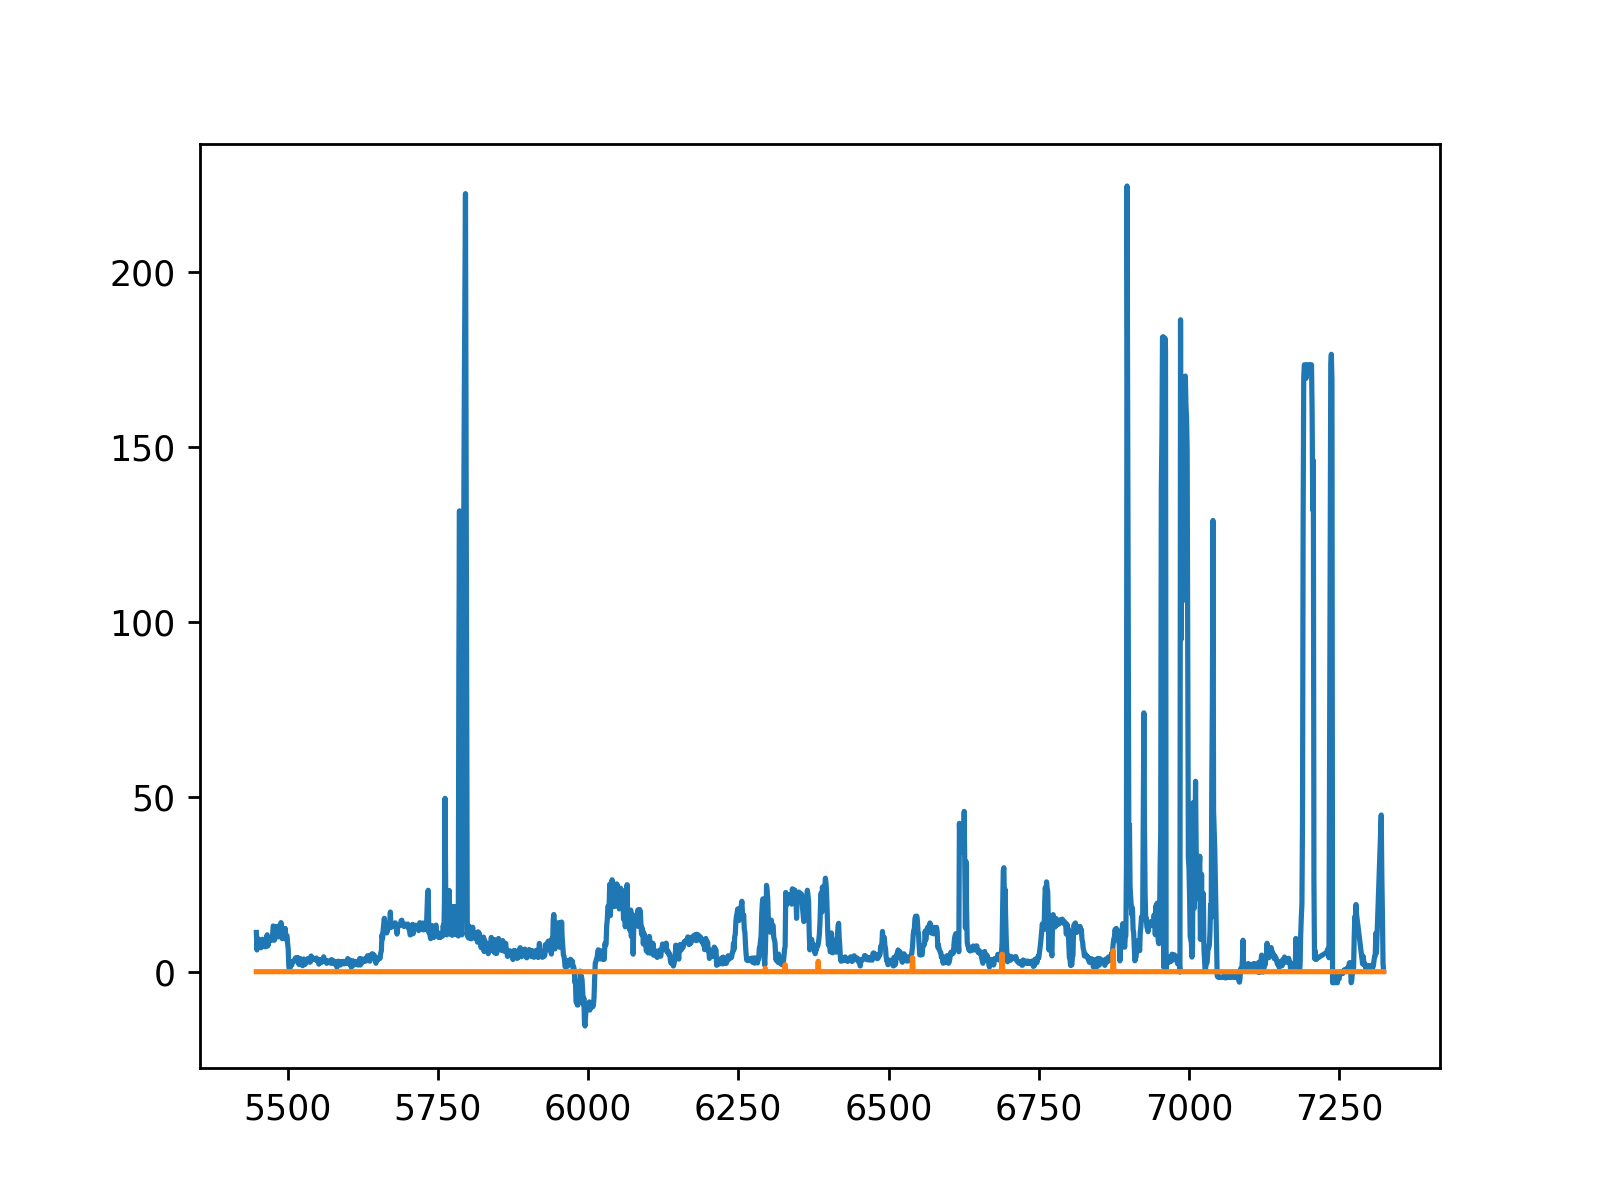

In [123]:
fig, ax = pl.subplots()
ax.plot(tj['signal'].dropna())
ax.plot(tj['onset_num'].dropna())
#.min(), traj['signal'].dropna().max()

<IPython.core.display.Javascript object>


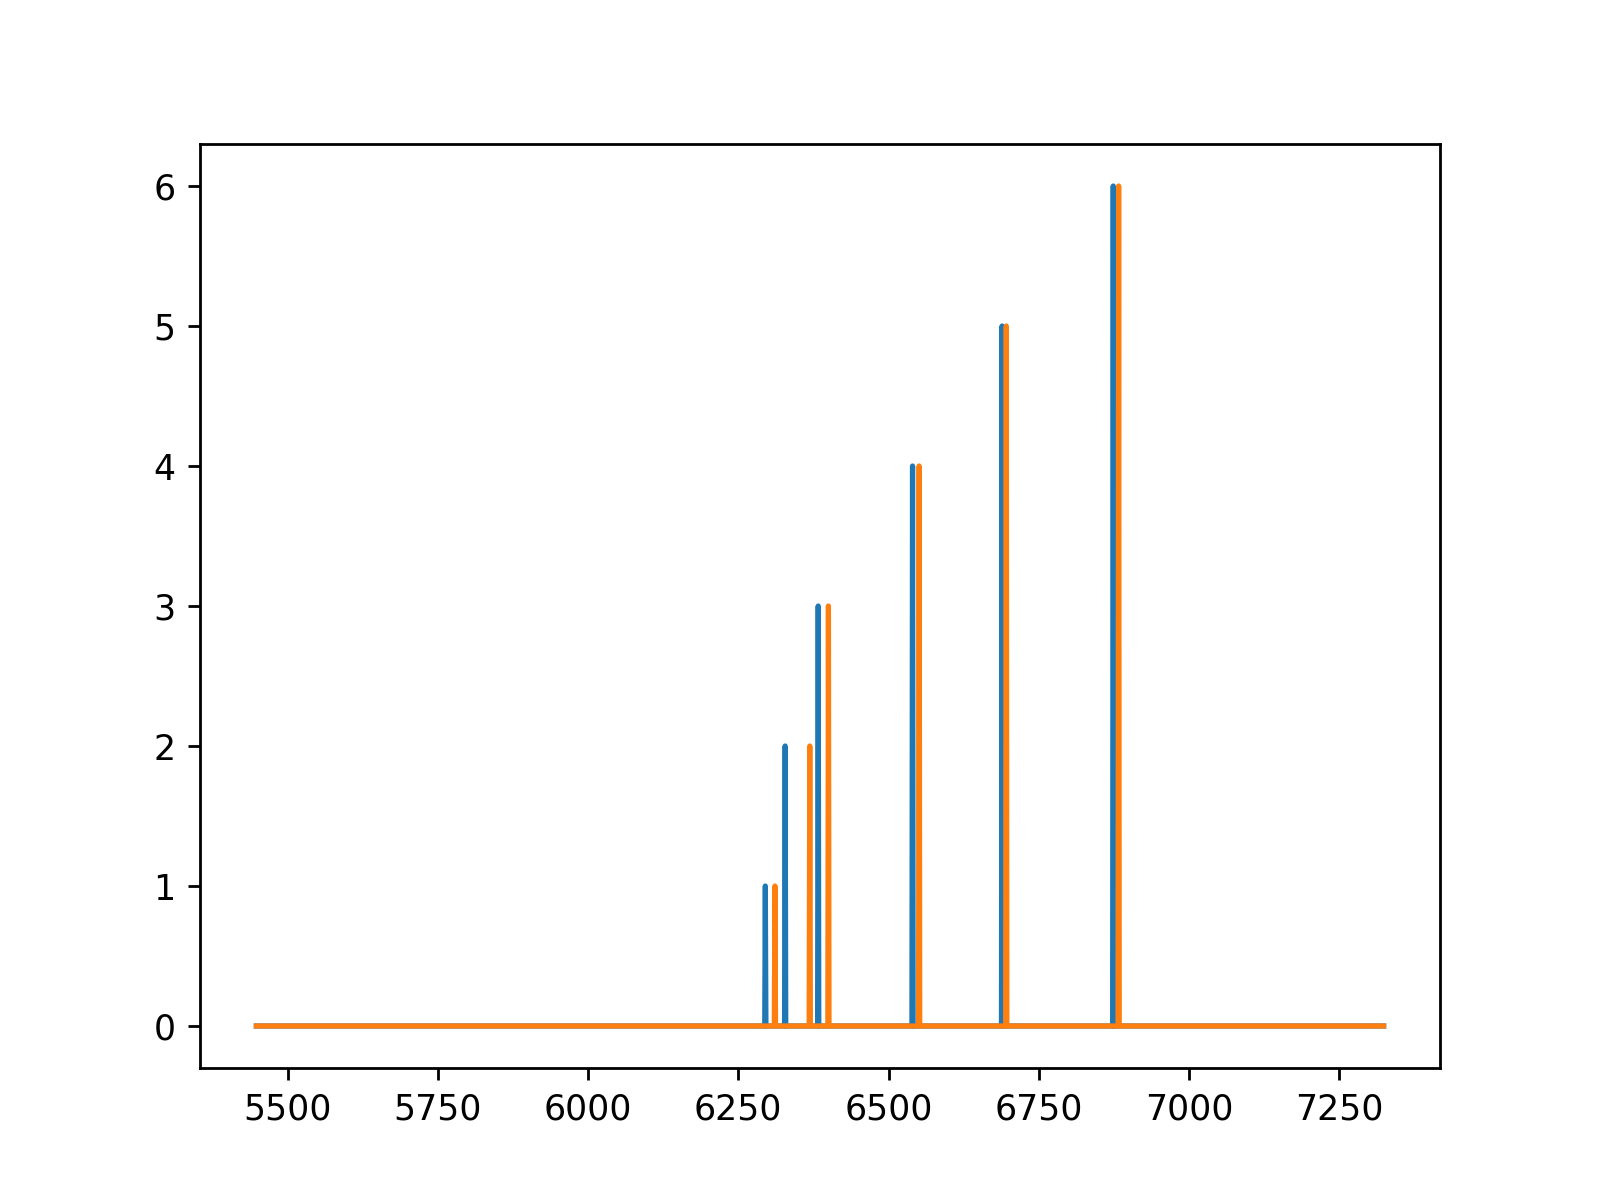

In [145]:
fig, ax = pl.subplots()
ax.plot(tj['onset_num'])
ax.plot(tj['offset_num'])


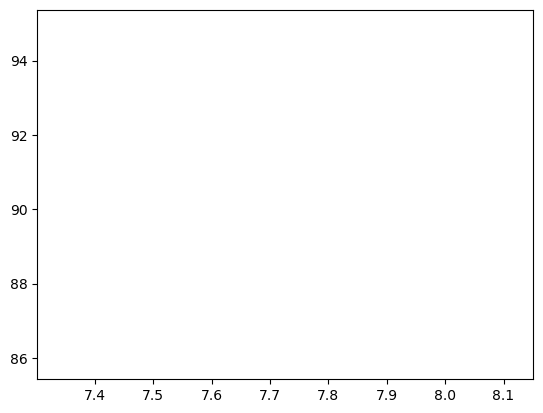

In [58]:
fig, ax =pl.subplots()
ax.plot(traj['sx'], traj['sy'])

In [57]:
traj['sx']

35436    7.726381
35437    7.726381
35438    7.726381
35439    7.726381
35440    7.726381
           ...   
58583    7.726381
58584    7.726381
58585    7.726381
58586    7.726381
58587    7.726381
Name: sx, Length: 14360, dtype: float64